In [109]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
import shap
shap.initjs()

In [110]:
def map_categorical_column(df):
    
    ''' Function to map the categorical columns '''
     
    map_payment_type      = {'AA':0, 'AB':1, 'AC':2, 'AD':3, 'AE':4}
    map_employment_status = {'CA':0, 'CB':1, 'CC':2, 'CD':3, 'CE':4,'CF':5,'CG':6}
    map_housing_status    = {'BA':0, 'BB':1, 'BC':2, 'BD':3, 'BE':4,'BF':5,'BG':6}
    map_source            = {'INTERNET':0,'TELEAPP':1}
    map_device_os         = {'windows':0,'other':1,'linux':2,'macintosh':3,'x11':4}
    
    # Updating the mapping in dataframe
    # df["payment_type"]                 = df["payment_type"].map(map_payment_type)
    # df["employment_status"]            = df["employment_status"].map(map_employment_status)
    df["housing_status"]               = df["housing_status"].map(map_housing_status)
    # df["source"]                       = df["source"].map(map_source)
    df["device_os"]                    = df["device_os"].map(map_device_os)

    return df

In [111]:
def create_sample_set(train_df, non_fraud_sample_sizse):
    
    # Select columns
    train_df = train_df[['housing_status',
                            'device_os',
                            'credit_risk_score',
                            'current_address_months_count',
                            'has_other_cards',
                            'keep_alive_session',
                            'prev_address_months_count',
                            'phone_home_valid',
                            'proposed_credit_limit',
                            'name_email_similarity',
                            'income',
                            'fraud_bool' 
                        ]]
                        
    # Fraud Transactions
    train_df_fraud = train_df[train_df.fraud_bool == 1]
    # display(f'Shape of train_df_fraud {train_df_fraud.shape}')
    
    # Non Fraud Transactions
    train_df_non_fraud = train_df[train_df.fraud_bool == 0].sample(train_df_fraud.shape[0] * non_fraud_sample_sizse)
    # display(f'Shape of train_df_non_fraud {train_df_non_fraud.shape}')
    
    # Merge Fraud & Non Fraud
    train_df_merged = pd.concat([train_df_fraud, train_df_non_fraud])
 
    # X & Y
    X                 = train_df_merged.drop(columns=['fraud_bool'])
    y                 = train_df_merged['fraud_bool']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    return X_train, y_train, X_test, y_test

In [112]:
intellifraud_dataset = pd.read_csv(f"../data/{'Base.csv'}", usecols=['housing_status',
                                                        'device_os',
                                                        'credit_risk_score',
                                                        'current_address_months_count',
                                                        'has_other_cards',
                                                        'keep_alive_session',
                                                        'prev_address_months_count',
                                                        'phone_home_valid',
                                                        'proposed_credit_limit',
                                                        'name_email_similarity',
                                                        'income',
                                                        'fraud_bool' 
                                                    ]
                        )

intellifraud_dataset.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,credit_risk_score,housing_status,phone_home_valid,has_other_cards,proposed_credit_limit,device_os,keep_alive_session
0,1,0.9,0.166828,-1,88,185,BA,1,0,500.0,windows,0
1,1,0.9,0.296286,-1,144,259,BA,0,0,1500.0,windows,0
2,1,0.9,0.044985,-1,132,177,BA,0,0,200.0,other,0
3,1,0.9,0.159511,-1,22,110,BA,0,1,200.0,linux,0
4,1,0.9,0.596414,-1,218,295,BA,1,0,1500.0,macintosh,1


In [113]:
input_df['fraud_bool'].value_counts()

0    988971
1     11029
Name: fraud_bool, dtype: int64

In [114]:
intellifraud_dataset_num = map_categorical_column(intellifraud_dataset)
intellifraud_dataset_num.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,credit_risk_score,housing_status,phone_home_valid,has_other_cards,proposed_credit_limit,device_os,keep_alive_session
0,1,0.9,0.166828,-1,88,185,0,1,0,500.0,0,0
1,1,0.9,0.296286,-1,144,259,0,0,0,1500.0,0,0
2,1,0.9,0.044985,-1,132,177,0,0,0,200.0,1,0
3,1,0.9,0.159511,-1,22,110,0,0,1,200.0,2,0
4,1,0.9,0.596414,-1,218,295,0,1,0,1500.0,3,1


In [115]:
X_train, y_train, X_test, y_test = create_sample_set(intellifraud_dataset_num, 1)

In [116]:
display(X_test.shape)
X_test.head()

(4412, 11)

,housing_status,device_os,credit_risk_score,current_address_months_count,has_other_cards,keep_alive_session,prev_address_months_count,phone_home_valid,proposed_credit_limit,name_email_similarity,income
18506,0,2,173,132,0,0,-1,0,1000.0,0.073524,0.6
385634,0,0,311,367,0,1,-1,1,1000.0,0.858104,0.1
531709,2,1,94,130,1,0,-1,1,200.0,0.735454,0.6
157964,2,1,257,199,0,1,-1,1,1500.0,0.474992,0.9
51973,2,1,232,6,0,0,46,0,1500.0,0.379031,0.9


In [117]:
classifier = joblib.load(f'../model/sample_1_1/LGBMClassifier.pkl')

In [46]:
explainer = shap.Explainer(classifier)
shap_values = explainer.shap_values(X_test)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [118]:
X_test.to_csv('../data/train_data_shap.csv', index=False)

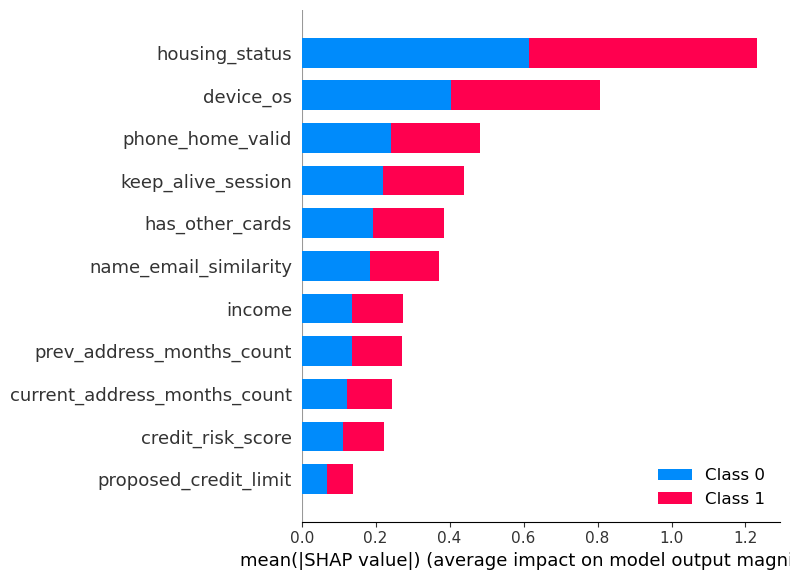

In [47]:
shap.summary_plot(shap_values, X_test)

In [51]:
inf_val = np.array([0, 0, 185, 88, 0 ,0 ,-1, 1, 505, 0.166828, 0.9])

In [57]:
shap_values[0][0,:]

array([ 0.51296298,  0.357775  ,  0.06236184,  0.18828705,  0.36652438,
        0.17668117,  0.33645049, -0.1269663 ,  0.04851863,  0.13415464,
        0.08530415])

In [79]:
classifier = joblib.load(f'../model/sample_1_1/LGBMClassifier.pkl')
explainer = shap.Explainer(classifier)
shap_values = explainer.shap_values(X_test)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [80]:
shap.plots.force(explainer.expected_value[1], 
                 shap_values[0][0,:], 
                 features = inf_val, 
                 feature_names=list(X_train.columns),
                 show=0
                )

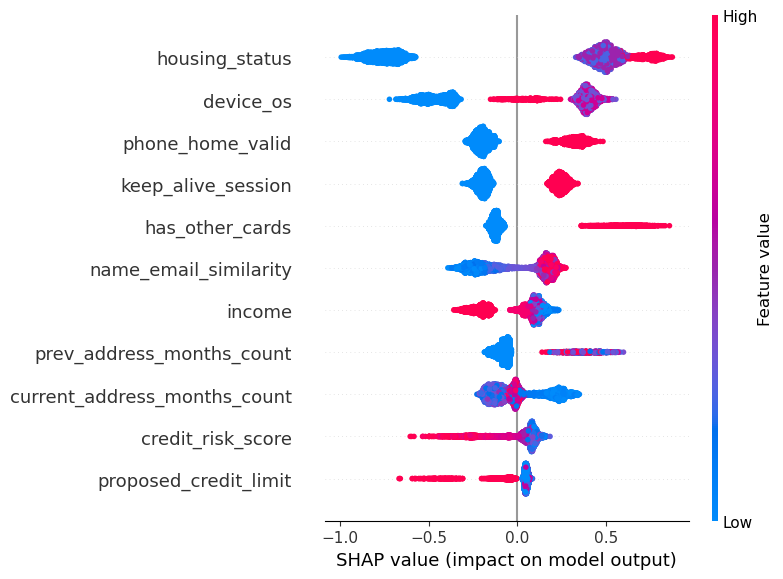

In [48]:
shap.summary_plot(shap_values[0], X_test)

In [98]:
inf_df = pd.DataFrame([inf_val], columns=['housing_status',
                                                        'device_os',
                                                        'credit_risk_score',
                                                        'current_address_months_count',
                                                        'has_other_cards',
                                                        'keep_alive_session',
                                                        'prev_address_months_count',
                                                        'phone_home_valid',
                                                        'proposed_credit_limit',
                                                        'name_email_similarity',
                                                        'income'
                                                    ])
inf_df

,housing_status,device_os,credit_risk_score,current_address_months_count,has_other_cards,keep_alive_session,prev_address_months_count,phone_home_valid,proposed_credit_limit,name_email_similarity,income
0,0.0,0.0,185.0,88.0,0.0,0.0,-1.0,1.0,505.0,0.166828,0.9


In [107]:
import eli5
classifier = joblib.load(f'../model/sample_1_1/LGBMClassifier.pkl')
eli5.show_weights(classifier, feature_names=list(X_train.columns))

Weight,Feature
0.3960,housing_status
0.1662,device_os
0.0770,has_other_cards
0.0704,phone_home_valid
0.0628,keep_alive_session
0.0495,name_email_similarity
0.0422,prev_address_months_count
0.0401,income
0.0373,current_address_months_count
0.0363,credit_risk_score


In [108]:
eli5.show_prediction(classifier, inf_df.iloc[0], show_feature_values=True)